# RNN Test

In [1]:
WORK_FOLDER='../'

In [2]:
import sys
sys.path.append(WORK_FOLDER)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from utils.helper import loadCovidData, plotPlaces
from utils.RNN import RNN
%matplotlib inline

In [6]:
df = loadCovidData(prefix=WORK_FOLDER)
df_total = df.groupby(by='fecha_informe').sum().reset_index()
unique_place = 'Comunidad de Madrid'
df_total['municipio_distrito'] = df_total.apply(lambda x: unique_place, axis=1)
_, df_total_inc = plotPlaces(df_total, np.array(['Comunidad de Madrid']), agg_factor=1, plot=False)
serie = df_total_inc['Contagios diarios'].to_numpy()

<Figure size 1440x504 with 0 Axes>

In [7]:
serie = df_total_inc['Contagios diarios'].to_numpy()

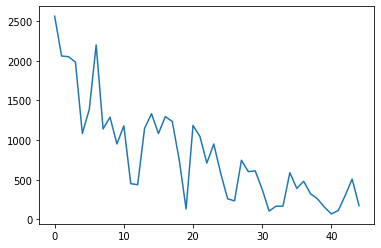

In [9]:
plt.plot(serie)

In [10]:
rnn = RNN(data=serie, window_size=14, lstm_units=16, epochs=150)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
score = rnn.train(verbose=0)

Instructions for updating:
Use tf.cast instead.
7/7 [==============================] - 0s 663us/step


In [12]:
score

0.009702801970498902

In [13]:
y, y_pred = rnn.getAllPredictions()

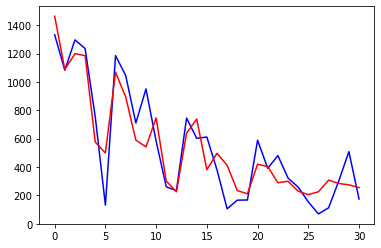

In [14]:
plt.plot(y,'b',y_pred,'r')

In [17]:
preds = rnn.predict(40)

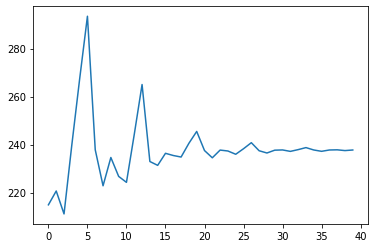

In [18]:
plt.plot(preds)